In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [91]:
df_2020 = pd.read_csv('2020(Completed).csv')

In [92]:
df_2021 = pd.read_csv('2021(Completed).csv')

In [93]:
can_2020 = df_2020[df_2020['Lang']=='Can']

In [94]:
can_2020.drop_duplicates(subset='song',keep='first',inplace=True)

In [95]:
can_2021 = df_2021[df_2021['Lang']=='Can']

In [96]:
can_2021.drop_duplicates(subset='song',keep='first',inplace=True)

In [97]:
mean_2020 = can_2020['Duration'].mean()
mean_2021= can_2021['Duration'].mean()

In [98]:
std_2020 = can_2020['Duration'].std()
std_2021 = can_2021['Duration'].std()


In [99]:
no_2020 = can_2020['Duration'].count()
no_2021 = can_2021['Duration'].count()

In [100]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = math.sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z,3), pval
z,p= twoSampZ(mean_2020,mean_2021,0,std_2020,std_2021,no_2020,no_2021)
print("Z & p values respectively are: " , z, "and", p)

Z & p values respectively are:  3.343 and 0.0008300497231648052


In [101]:
df_2020['streams']=df_2020['streams'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
#lang ANOVA test: mean in stream has difference across different languages?
anova_2020 = df_2020[['Lang','streams']]
anova_2021 = df_2021[['Lang','streams']]
grps = pd.unique(df_2020.Lang.values)

In [13]:
d_data = {grp:anova_2020['streams'][anova_2020.Lang == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Can'], d_data['Eng'], d_data['Other'], d_data['Man'])

NameError: name 'grps' is not defined

In [198]:
print('F ={},p={}'.format(F,p))

F =67.41628398713554,p=3.540270892786529e-43


In [131]:
#2021
d_data = {grp:anova_2021['streams'][anova_2021.Lang == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Can'], d_data['Eng'], d_data['Other'], d_data['Man'])
print('F ={},p={}'.format(F,p))

F =119.6177423621802,p=3.466401253827875e-76


In [204]:
df_2020.groupby('Lang')['streams'].mean()

Lang
Can      32556.894101
Eng      35695.345976
Man      29789.524621
Other    39519.345018
Name: streams, dtype: float64

In [135]:
df_2021.groupby('Lang')['streams'].mean()

Lang
Can      50164.787400
Eng      39437.374958
Man      37263.680808
Other    37298.374297
Name: streams, dtype: float64

In [200]:
#lang ANOVA test: mean in stream has difference across different languages?
anova_2020 = can_2020[['Gender','streams']]
anova_2021 = can_2021[['Gender','streams']]
grps = pd.unique(df_2020.Gender.values)

In [201]:
grps

array(['M', 'G', 'F'], dtype=object)

In [202]:
gender = df_2020.Gender

In [203]:
gender.value_counts()

M    4361
F    3242
G    2997
Name: Gender, dtype: int64

In [223]:
can_2020.groupby('Company').count()

,Unnamed: 0,date,song,singer,streams,url_list,Duration,Gender,Lang,jane
Company,,,,,,,,,,
3721 Productions,1,1,1,1,1,1,1,1,1,1
"3721 Productions, under exclusive license to Sony Music Entertainment Hong Kong Ltd.",1,1,1,1,1,1,1,1,1,1
A.Room Production Co.,1,1,1,1,1,1,1,1,1,1
Amusic,8,8,8,8,8,8,8,8,8,8
CAPITAL ARTISTS LTD,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
mm2 Studios Hong Kong Limited,1,1,1,1,1,1,1,1,1,1
光復香港唱片公司,1,1,1,1,1,1,1,1,1,1
幻國文化娛樂有限公司 imagine.nation entertainment limited,4,4,4,4,4,4,4,4,4,4


<AxesSubplot:xlabel='streams', ylabel='Company'>

C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38480 missing 

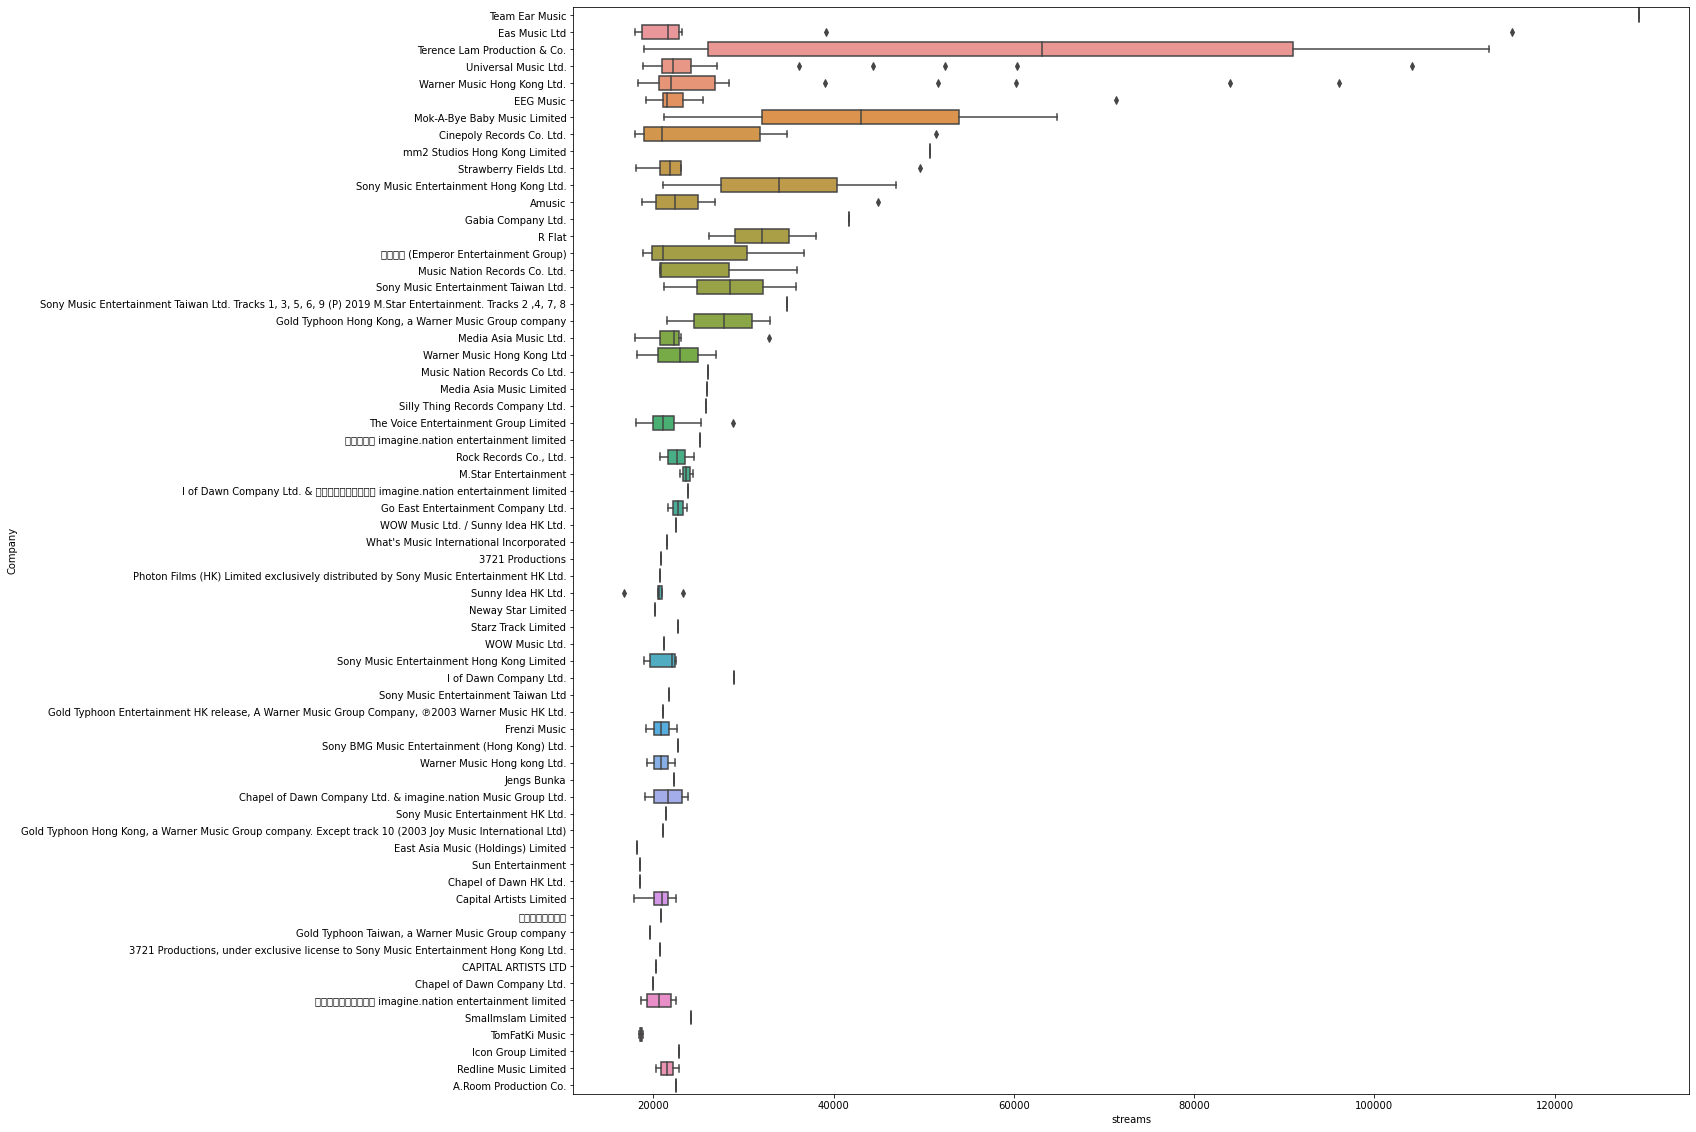

In [229]:
mpl.rcParams['figure.figsize'] = [20, 20]
sns.boxplot(data = can_2020,y="Company",x="streams",orient='h') 

In [231]:
can_2020[can_2020['Company']=='Team Ear Music']

,Unnamed: 0,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,jane
0,0,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,0


<AxesSubplot:xlabel='streams', ylabel='Company'>

C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22914 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21496 missing 

C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32893 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35211 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20195 missing from curre

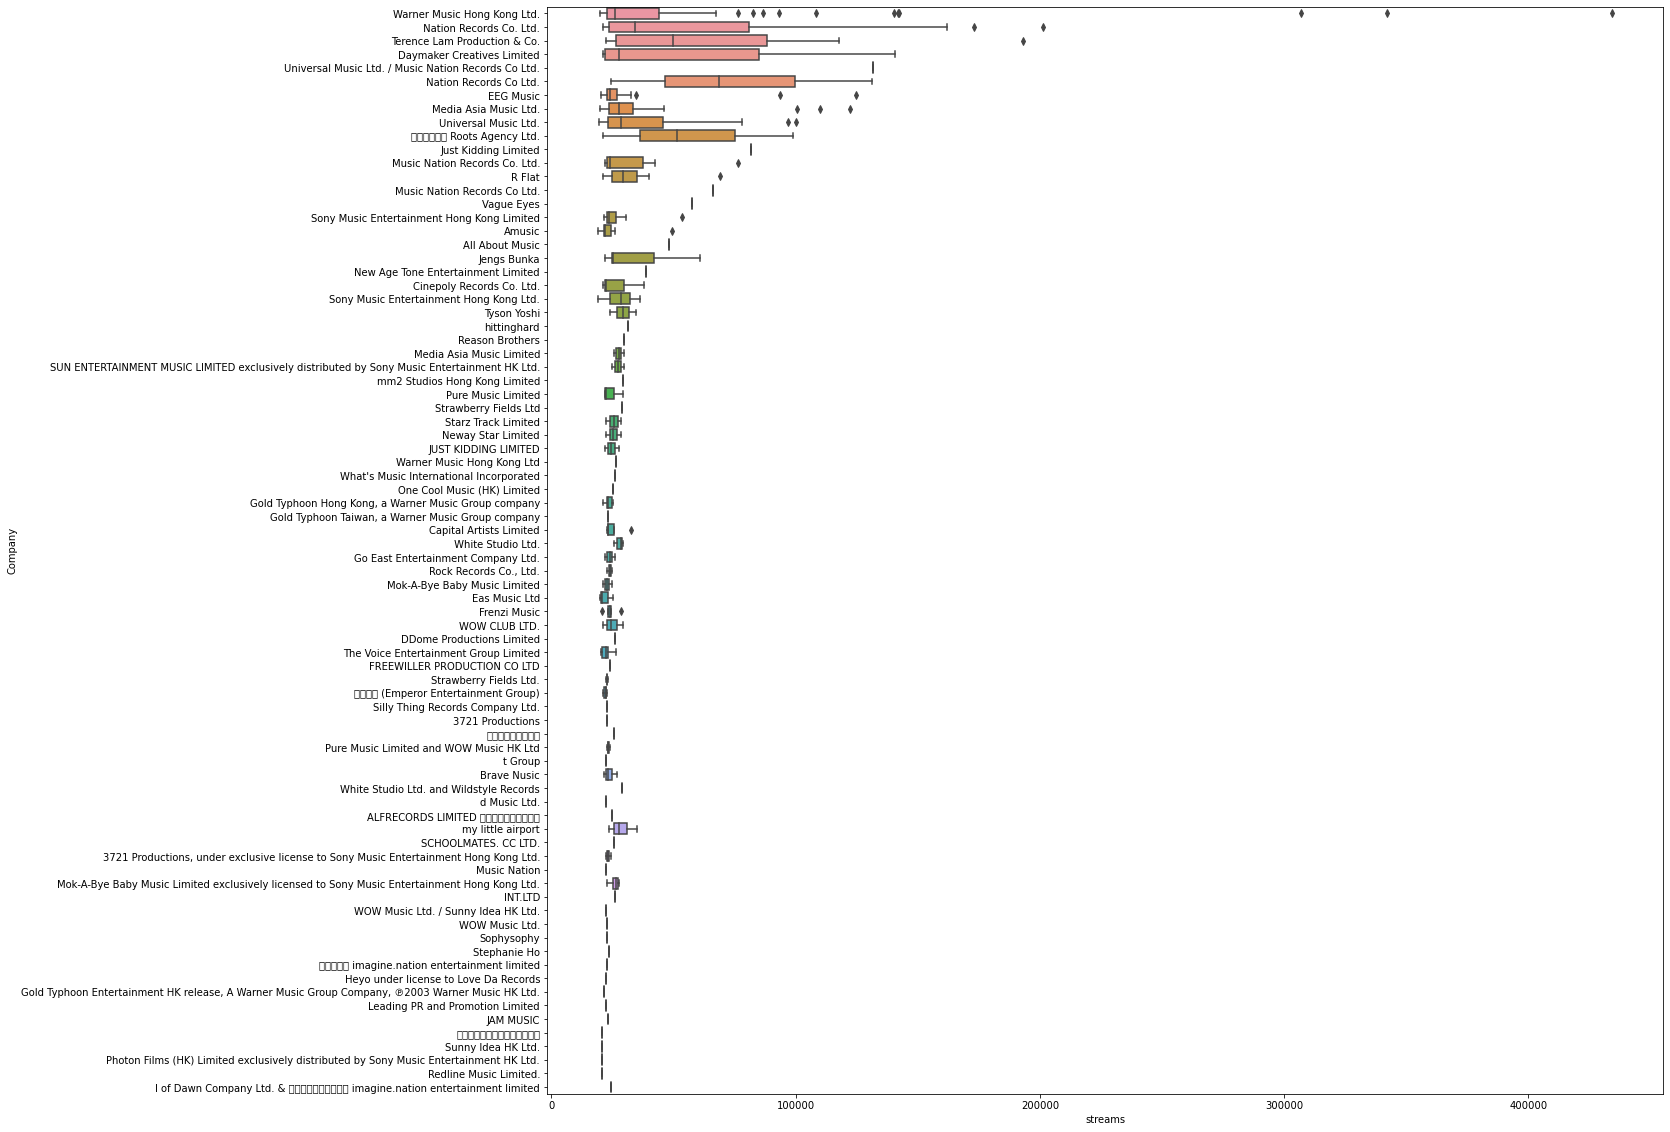

In [232]:
mpl.rcParams['figure.figsize'] = [20, 20]
sns.boxplot(data = can_2021,y="Company",x="streams",orient='h') 

<AxesSubplot:xlabel='streams', ylabel='singer'>

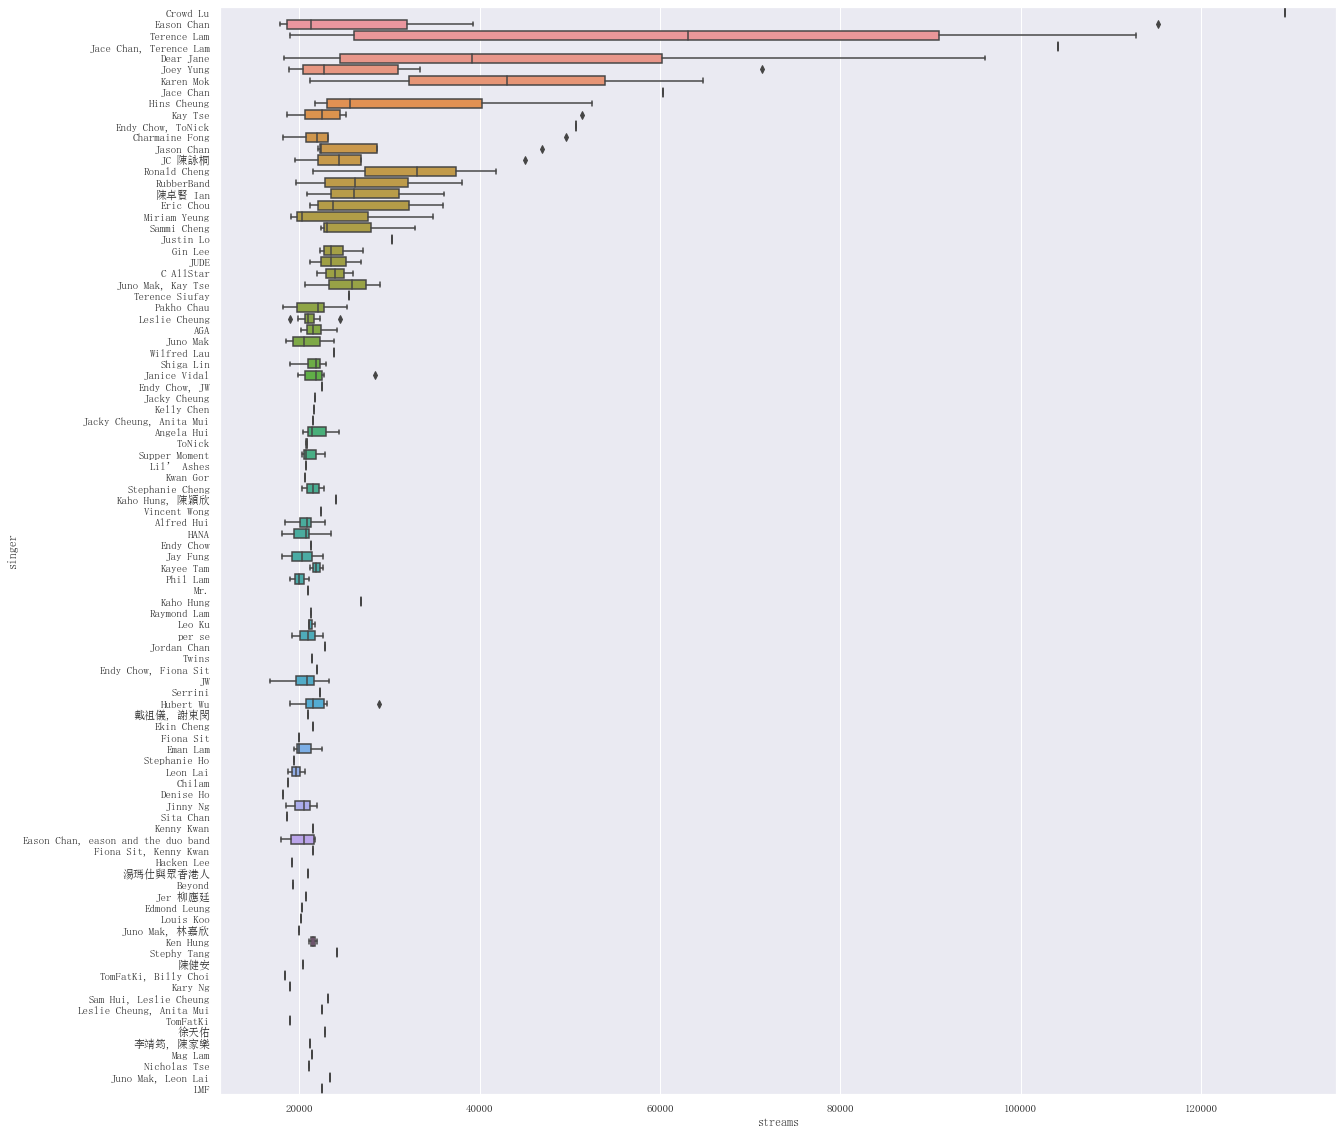

In [237]:
sns.set(font="SimSun")
sns.boxplot(data = can_2020,y="singer",x="streams",orient='h') 

In [236]:
can_2020.groupby('singer').count()

,Unnamed: 0,date,song,streams,url_list,Company,Duration,Gender,Lang,jane
singer,,,,,,,,,,
AGA,6,6,6,6,6,6,6,6,6,6
Alfred Hui,5,5,5,5,5,4,5,5,5,5
Angela Hui,3,3,3,3,3,3,3,3,3,3
Beyond,1,1,1,1,1,1,1,1,1,1
C AllStar,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
"戴祖儀, 謝東閔",1,1,1,1,1,1,1,1,1,1
"李靖筠, 陳家樂",1,1,1,1,1,1,1,1,1,1
湯瑪仕與眾香港人,1,1,1,1,1,1,1,1,1,1


In [238]:
combined_can = pd.concat([can_2020,can_2021])

<AxesSubplot:xlabel='streams', ylabel='singer'>

C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 148665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 148665 missing from current font.
  font.set_text(s, 0, flags=flags)


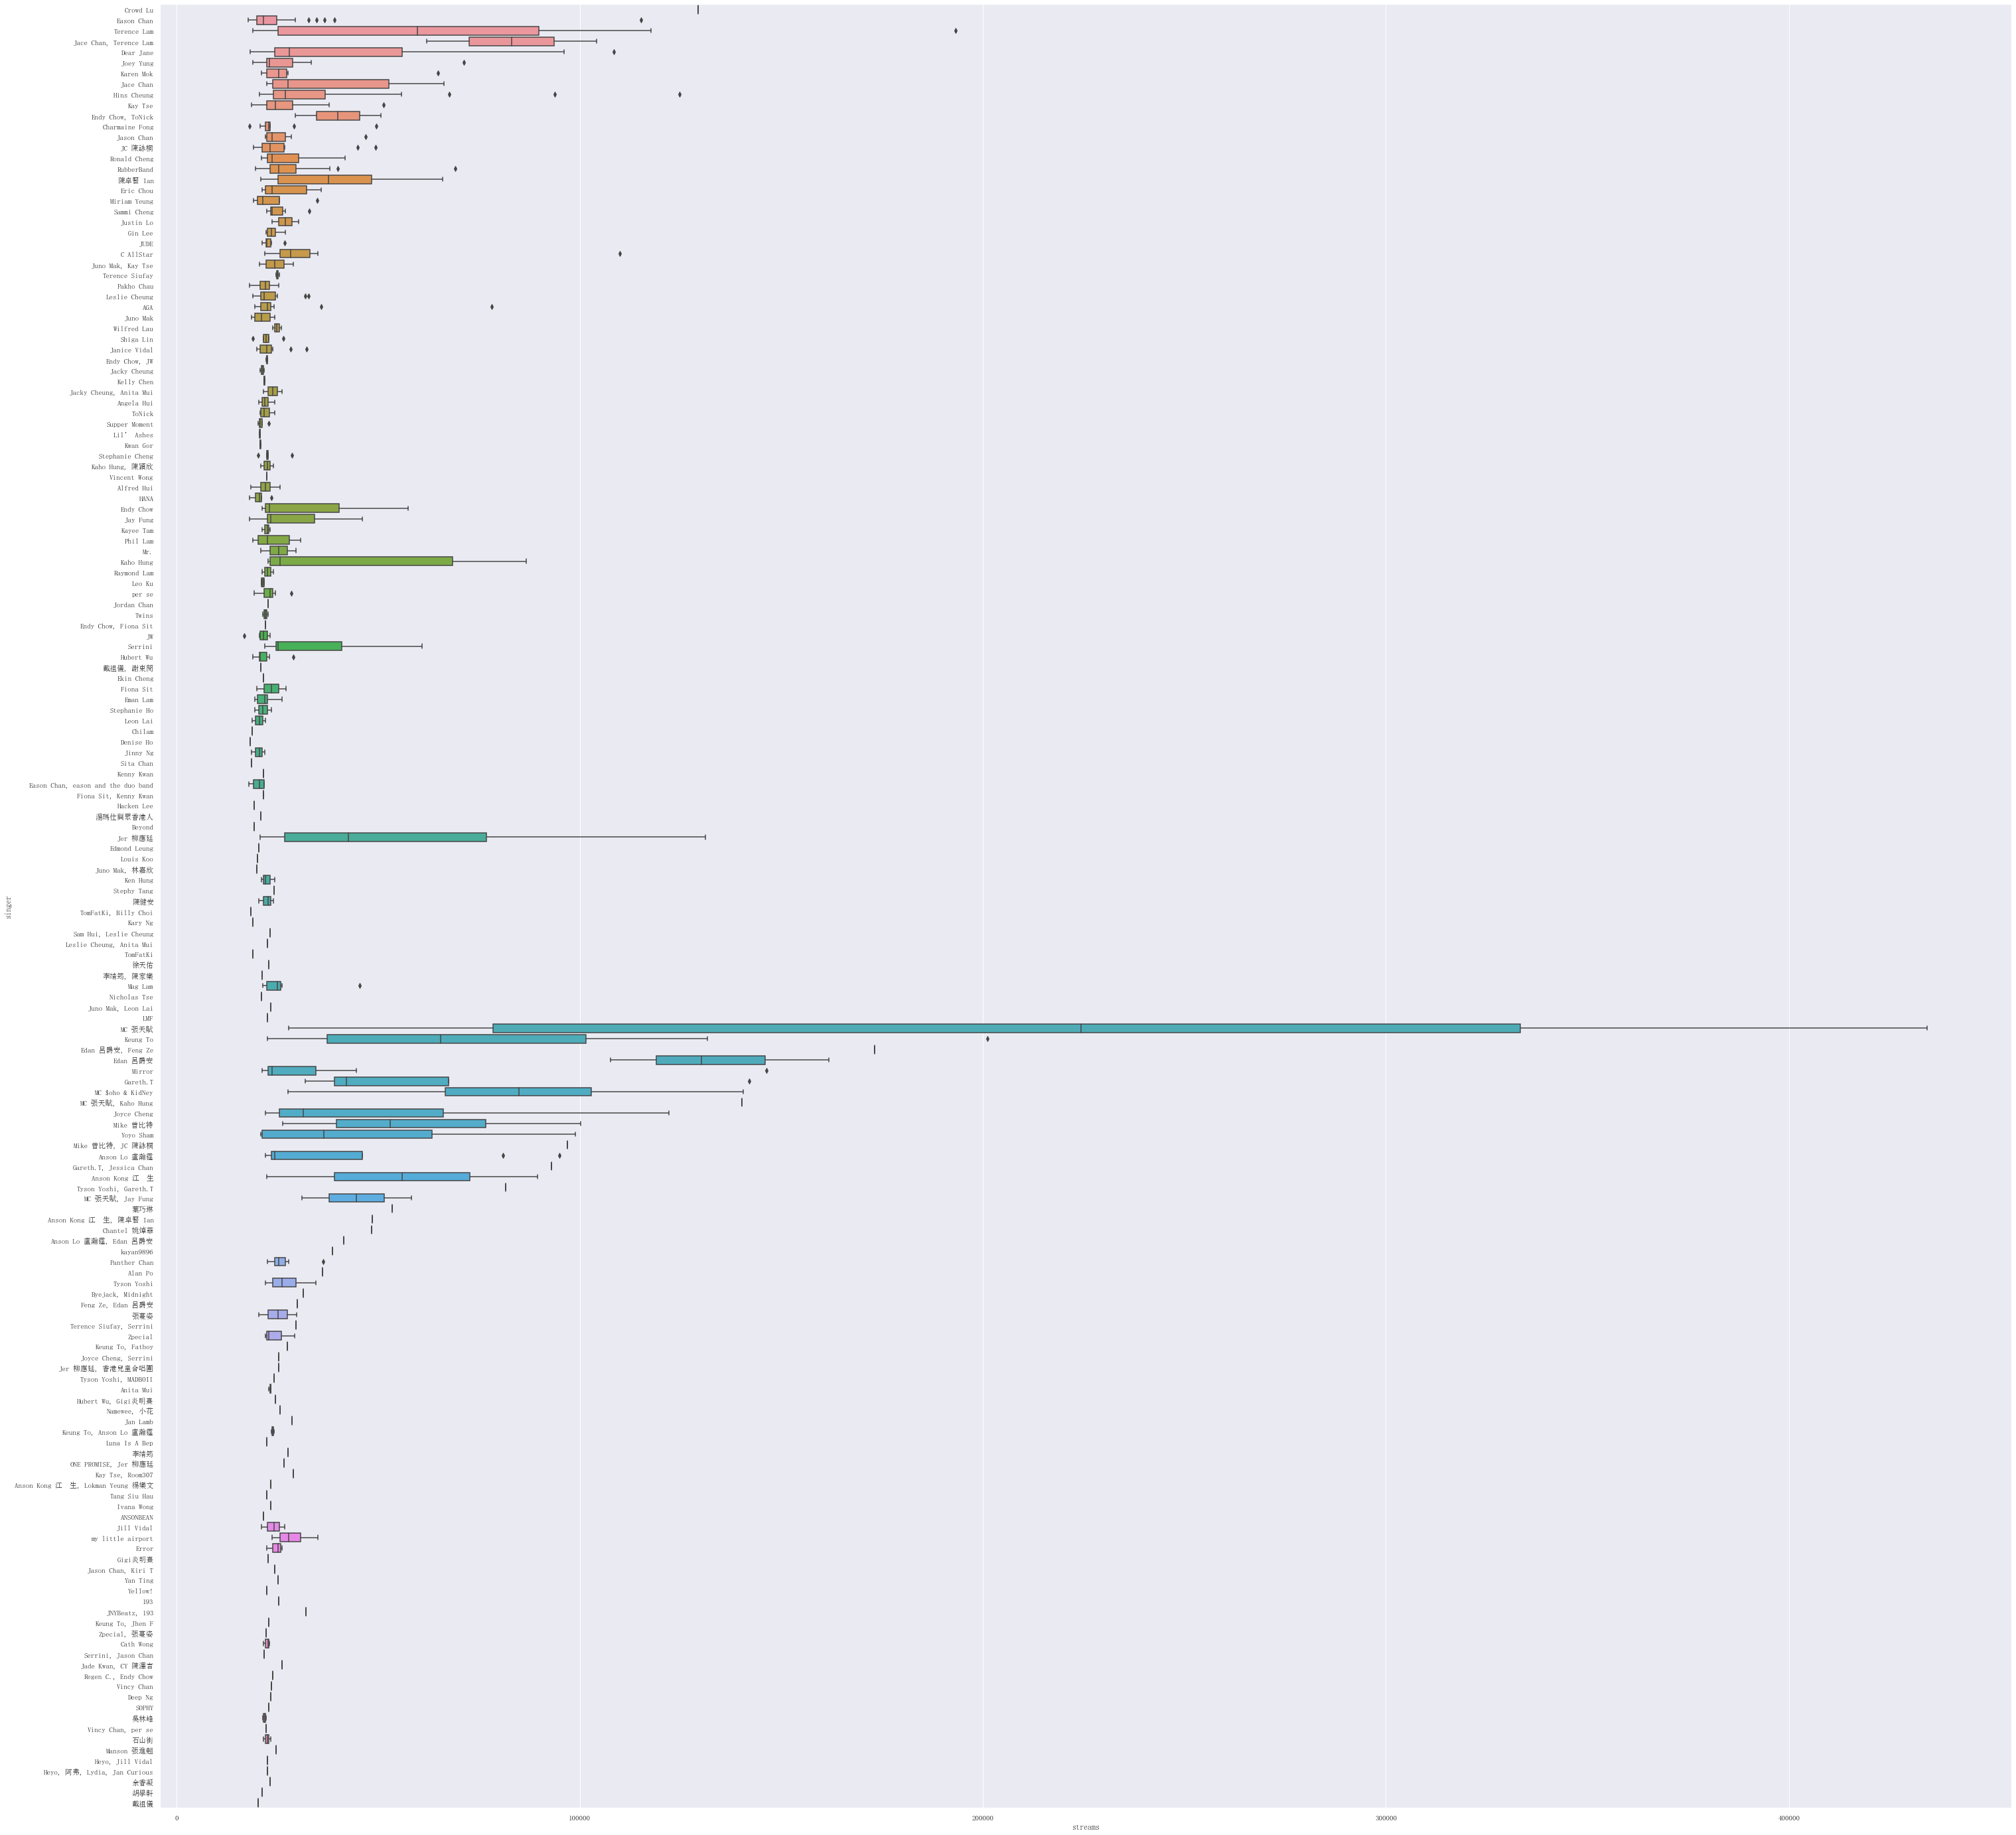

In [240]:
mpl.rcParams['figure.figsize'] = [50, 50]
sns.boxplot(data = combined_can,y="singer",x="streams",orient='h')

In [1]:
df_2020

NameError: name 'df_2020' is not defined

In [290]:
combined_df = pd.concat([df_2020,df_2021])

In [291]:
combined_df = combined_df.reset_index()

In [292]:
combined_df['index'] = combined_df['index'] + 1

In [293]:
combined_df['index'] = combined_df['index']%200

In [294]:
combined_df['index']=combined_df['index'].replace(0,200)

In [278]:
combined_df['index'].iloc[199]

200

In [283]:
combined_df.groupby('song').index.value_counts()

song                  index
#One                  8        1
                      60       1
00:00 (Zero O’Clock)  15       1
                      46       1
                      86       1
                              ..
시작                    103      1
                      114      1
                      155      1
                      161      1
지코 아무노래               107      1
Name: index, Length: 16992, dtype: int64

In [303]:
combined_df['index']=combined_df.index.astype(int)
combined_df['ranking']=combined_df['index']

In [301]:
df = combined_df[combined_df.index < 11]

In [305]:
combined_df['ranking'] = combined_df['ranking']+1

In [307]:
combined_df['ranking'] = combined_df['ranking']%200

In [310]:
combined_df['ranking']=combined_df['ranking'].replace(0,200)
combined_df

,index,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,ranking
0,0,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,1
1,1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can,2
2,2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can,3
3,3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can,4
4,4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can,5
...,...,...,...,...,...,...,...,...,...,...,...
21195,21195,2021-01-01--2021-01-08,あの夢をなぞって,YOASOBI,19571.0,https://open.spotify.com/track/5ptl2PXkiSth54H...,YOASOBI,240,G,Other,196
21196,21196,2021-01-01--2021-01-08,AYA,MAMAMOO,19529.0,https://open.spotify.com/track/4BZXVFYCb76Q0Kl...,"RBW Inc.,under license to Kakao M Corp.",211,G,Other,197
21197,21197,2021-01-01--2021-01-08,See You Next Time,AGA,19484.0,https://open.spotify.com/track/0y0l2x1hEwQ8d6Y...,Universal Music Ltd.,257,F,Can,198
21198,21198,2021-01-01--2021-01-08,DDU-DU DDU-DU,BLACKPINK,19408.0,https://open.spotify.com/track/2aI2k39nfa3KFsa...,"YG Entertainment, distributed through Intersco...",211,G,Other,199


In [311]:
df = combined_df[combined_df.ranking < 11]

In [315]:
df_top_ten = df.copy()

In [318]:
df_top_ten.groupby('song').ranking.value_counts()

song         ranking
#One         8          1
12           9          2
34+35        5          1
After Hours  10         1
Afterglow    7          1
                       ..
難道喜歡處女座      10         1
鯨落           7          1
             8          1
             9          1
             10         1
Name: ranking, Length: 538, dtype: int64

In [319]:
top_10_2020 = df_2020.copy()

In [321]:
top_10_2020.reset_index(inplace=True)

In [323]:
top_10_2020['ranking'] = top_10_2020.index+1

In [325]:
top_10_2020['ranking'] = top_10_2020['ranking']%200

In [330]:

top_10_2020 = top_10_2020.replace(0,200)
top_10_2020

,index,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,ranking
0,200,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,1
1,1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can,2
2,2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can,3
3,3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can,4
4,4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can,5
...,...,...,...,...,...,...,...,...,...,...,...
10595,10595,2019-12-27--2020-01-03,Attention,Charlie Puth,20796.0,https://open.spotify.com/track/5cF0dROlMOK5uNZ...,"Artist Partner Group, Inc. for the United Stat...",208,M,Eng,196
10596,10596,2019-12-27--2020-01-03,boyfriend (with Social House),Ariana Grande,20777.0,https://open.spotify.com/track/0Ryd8975WihbObp...,"SRV LabelCo, LLC and Republic Records, a divis...",186,F,Eng,197
10597,10597,2019-12-27--2020-01-03,最後晚餐,Supper Moment,20640.0,https://open.spotify.com/track/0Jm0goItLKozRDZ...,Redline Music Limited,333,G,Can,198
10598,10598,2019-12-27--2020-01-03,Let Me Down Slowly,Alec Benjamin,20584.0,https://open.spotify.com/track/2qxmye6gAegTMjL...,NaN,169,M,Eng,199


In [331]:
top_10_2020 = top_10_2020[top_10_2020.ranking < 11]

In [336]:
top_10_2020

,index,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,ranking
0,200,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,1
1,1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can,2
2,2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can,3
3,3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can,4
4,4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can,5
...,...,...,...,...,...,...,...,...,...,...,...
10405,10405,2019-12-27--2020-01-03,everything i wanted,Billie Eilish,84483.0,https://open.spotify.com/track/3ZCTVFBt2Brf31R...,Darkroom/Interscope Records,245,F,Eng,6
10406,10406,2019-12-27--2020-01-03,Circles,Post Malone,84254.0,https://open.spotify.com/track/21jGcNKet2qwijl...,"Republic Records, a division of UMG Recordings...",215,M,Eng,7
10407,10407,2019-12-27--2020-01-03,"讓愛高飛 - 劇集 ""多功能老婆"" 片尾曲",Pakho Chau,78480.0,https://open.spotify.com/track/7nIxo0dE9d4FBwP...,The Voice Entertainment Group Limited,220,M,Can,8
10408,10408,2019-12-27--2020-01-03,Don't Start Now,Dua Lipa,78316.0,https://open.spotify.com/track/6WrI0LAC5M1Rw2M...,Dua Lipa Limited under exclusive license to Wa...,183,F,Eng,9


In [342]:
song_2020=pd.unique(top_10_2020.song)

In [343]:
song_2020

array(['刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心底的名字>主題曲', '是但求其愛',
       '一人之境 in C major', '時光倒流一句話', '隔離 - Studio Live Duet', '銀河修理員',
       'Afterglow', 'All I Want for Christmas Is You', 'Last Christmas',
       'Santa Tell Me', "Rockin' Around The Christmas Tree", 'willow',
       '炎', 'Dynamite', 'Life Goes On', 'positions',
       'Monster (Shawn Mendes & Justin Bieber)', 'Therefore I Am',
       'Blue & Grey', 'Lovesick Girls', 'How You Like That',
       'Ice Cream (with Selena Gomez)', "I CAN'T STOP ME",
       'Lonely (with benny blanco)', '34+35', 'Pretty Savage',
       'Holy (feat. Chance The Rapper)', 'Bet You Wanna (feat. Cardi B)',
       '想見你想見你想見你(電視劇"想見你"片尾曲)', 'Crazy Over You', 'Love To Hate Me',
       'You Never Know', '呼吸有害', '哀的美敦書', '地球上最浪漫的一首歌',
       'Mood (feat. iann dior)', 'WAP (feat. Megan Thee Stallion)',
       '一人之境', 'Not Shy', 'Laugh Now Cry Later (feat. Lil Durk)',
       'Smile (with The Weeknd)', 'cardigan', '我該放手', 'my future',
       

In [ ]:
s='銀河修理員'
top_10_2020

In [358]:
test = np.concatenate([([i]*200) for i in range(106)], axis=0)

In [359]:
test

array([  0,   0,   0, ..., 105, 105, 105])

In [360]:
combined_df['week']=test

In [361]:
combined_df

,index,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,ranking,week
0,0,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,1,0
1,1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can,2,0
2,2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can,3,0
3,3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can,4,0
4,4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21195,21195,2021-01-01--2021-01-08,あの夢をなぞって,YOASOBI,19571.0,https://open.spotify.com/track/5ptl2PXkiSth54H...,YOASOBI,240,G,Other,196,105
21196,21196,2021-01-01--2021-01-08,AYA,MAMAMOO,19529.0,https://open.spotify.com/track/4BZXVFYCb76Q0Kl...,"RBW Inc.,under license to Kakao M Corp.",211,G,Other,197,105
21197,21197,2021-01-01--2021-01-08,See You Next Time,AGA,19484.0,https://open.spotify.com/track/0y0l2x1hEwQ8d6Y...,Universal Music Ltd.,257,F,Can,198,105
21198,21198,2021-01-01--2021-01-08,DDU-DU DDU-DU,BLACKPINK,19408.0,https://open.spotify.com/track/2aI2k39nfa3KFsa...,"YG Entertainment, distributed through Intersco...",211,G,Other,199,105


In [362]:
df_2020_2021_top_10 = combined_df[combined_df.ranking < 11]

In [366]:
top_10_2020 = df_2020_2021_top_10[df_2020_2021_top_10.week < 53]

In [369]:
song_2020=pd.unique(top_10_2020.song)

In [430]:
song_2020

array(['刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心底的名字>主題曲', '是但求其愛',
       '一人之境 in C major', '時光倒流一句話', '隔離 - Studio Live Duet', '銀河修理員',
       'Afterglow', 'All I Want for Christmas Is You', 'Last Christmas',
       'Santa Tell Me', "Rockin' Around The Christmas Tree", 'willow',
       '炎', 'Dynamite', 'Life Goes On', 'positions',
       'Monster (Shawn Mendes & Justin Bieber)', 'Therefore I Am',
       'Blue & Grey', 'Lovesick Girls', 'How You Like That',
       'Ice Cream (with Selena Gomez)', "I CAN'T STOP ME",
       'Lonely (with benny blanco)', '34+35', 'Pretty Savage',
       'Holy (feat. Chance The Rapper)', 'Bet You Wanna (feat. Cardi B)',
       '想見你想見你想見你(電視劇"想見你"片尾曲)', 'Crazy Over You', 'Love To Hate Me',
       'You Never Know', '呼吸有害', '哀的美敦書', '地球上最浪漫的一首歌',
       'Mood (feat. iann dior)', 'WAP (feat. Megan Thee Stallion)',
       '一人之境', 'Not Shy', 'Laugh Now Cry Later (feat. Lil Durk)',
       'Smile (with The Weeknd)', 'cardigan', '我該放手', 'my future',
       

In [375]:
index_list = df_2020_2021_top_10.index[df_2020_2021_top_10['song'] == song_2020[0]].tolist()

In [377]:
top_ten_index = {i:df_2020_2021_top_10.index[df_2020_2021_top_10['song'] == i].tolist() for i in song_2020}

In [429]:
top_ten_index


{'刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心底的名字>主題曲': [0,
  207,
  405,
  607,
  805,
  1207,
  1404,
  1607,
  1805,
  2004,
  2207,
  2608,
  19009,
  19207,
  19408,
  19607,
  19807,
  20005,
  20206,
  20405,
  20605,
  20803,
  21002],
 '是但求其愛': [1,
  203,
  400,
  600,
  800,
  1001,
  19008,
  19205,
  19404,
  19604,
  19805,
  20006,
  20207,
  20406,
  20606,
  20805,
  21006],
 '一人之境 in C major': [2,
  204,
  401,
  601,
  803,
  1006,
  1205,
  1405,
  1608,
  1807,
  2006,
  2204,
  15009,
  15209,
  15409,
  15802,
  16001,
  16201,
  16402,
  16602,
  16802,
  17002,
  17201,
  17401,
  17600,
  17800,
  18000,
  18204,
  18404,
  18605,
  18804,
  19003,
  19200,
  19400,
  19600,
  19800,
  20000,
  20200,
  20400,
  20600,
  20800,
  21000],
 '時光倒流一句話': [3,
  206,
  404,
  605,
  808,
  1004,
  1208,
  15808,
  16005,
  16205,
  16405,
  16603,
  16803,
  17004,
  17202,
  17402,
  17602,
  17801,
  18001,
  18202,
  18403,
  18603,
  18803,
  19004,
  19201,
  

In [390]:
df_2020_2021_top_10.iloc[805].week

80

In [427]:
song_top_10_count = {}
for i in song_2020:
    count = 0
    initial_index = df_2020_2021_top_10.iloc[top_ten_index[i][0]].week
    for j in top_ten_index[i]:
        if df_2020_2021_top_10.iloc[j].week <initial_index+54:
            count = count +1
        else:
            break
    song_top_10_count[i] = count
            
    

IndexError: single positional indexer is out-of-bounds

In [425]:
df_2020_2021_top_10.iloc[21009]

IndexError: single positional indexer is out-of-bounds

In [409]:
top_ten_index[song_2020[1]]


[1,
 203,
 400,
 600,
 800,
 1001,
 19008,
 19205,
 19404,
 19604,
 19805,
 20006,
 20207,
 20406,
 20606,
 20805,
 21006]

In [421]:
i

'Afterglow'

In [428]:
song_top_10_count

{'刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心底的名字>主題曲': 3,
 '是但求其愛': 3,
 '一人之境 in C major': 3,
 '時光倒流一句話': 3,
 '隔離 - Studio Live Duet': 3,
 '銀河修理員': 3}

In [9]:
first_week_2020 = df_2020[df_2020['date']=='2019-12-27--2020-01-03']
last_week_2021 =  df_2021[df_2021['date']=='2021-12-31--2022-01-07']
#2020 last week by lang
#pie chart

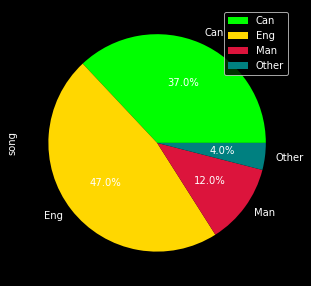

In [45]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(5,5))
chart = first_week_2020.groupby('Lang').song.count().plot(kind='pie',autopct='%1.1f%%',legend=True,colors=['lime','gold','crimson','teal'])



<AxesSubplot:ylabel='song'>

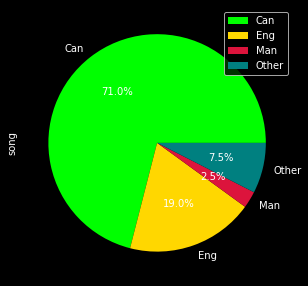

In [46]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(5,5))
last_week_2021.groupby('Lang').song.count().plot(kind='pie',autopct='%1.1f%%',legend=True,colors=['lime','gold','crimson','teal'])

In [47]:
df_2020

,date,song,singer,streams,url_list,Company,Duration,Gender,Lang
0,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can
1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can
2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can
3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can
4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can
...,...,...,...,...,...,...,...,...,...
10595,2019-12-27--2020-01-03,Attention,Charlie Puth,20796.0,https://open.spotify.com/track/5cF0dROlMOK5uNZ...,"Artist Partner Group, Inc. for the United Stat...",208,M,Eng
10596,2019-12-27--2020-01-03,boyfriend (with Social House),Ariana Grande,20777.0,https://open.spotify.com/track/0Ryd8975WihbObp...,"SRV LabelCo, LLC and Republic Records, a divis...",186,F,Eng
10597,2019-12-27--2020-01-03,最後晚餐,Supper Moment,20640.0,https://open.spotify.com/track/0Jm0goItLKozRDZ...,Redline Music Limited,333,G,Can
10598,2019-12-27--2020-01-03,Let Me Down Slowly,Alec Benjamin,20584.0,https://open.spotify.com/track/2qxmye6gAegTMjL...,NaN,169,M,Eng


In [104]:
df_ALL = pd.concat([df_2020,df_2021])

In [105]:
df_ALL=df_ALL.reset_index()

In [106]:
df_ALL.columns = ['index','date','song','singer','streams','url_list','Company','Duration','Gender','Lang']

In [107]:
df_ALL['rank'] = df_ALL.index + 1

In [108]:
df_ALL= df_ALL.drop('week',axis=1)

KeyError: "['week'] not found in axis"

In [109]:
df_ALL['rank'] = df_ALL['rank']%200
df_ALL = df_ALL.replace(0,200)
df_ALL

,index,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,rank
0,200,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,1
1,1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can,2
2,2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can,3
3,3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can,4
4,4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can,5
...,...,...,...,...,...,...,...,...,...,...,...
21195,10595,2021-01-01--2021-01-08,あの夢をなぞって,YOASOBI,19571.0,https://open.spotify.com/track/5ptl2PXkiSth54H...,YOASOBI,240,G,Other,196
21196,10596,2021-01-01--2021-01-08,AYA,MAMAMOO,19529.0,https://open.spotify.com/track/4BZXVFYCb76Q0Kl...,"RBW Inc.,under license to Kakao M Corp.",211,G,Other,197
21197,10597,2021-01-01--2021-01-08,See You Next Time,AGA,19484.0,https://open.spotify.com/track/0y0l2x1hEwQ8d6Y...,Universal Music Ltd.,257,F,Can,198
21198,10598,2021-01-01--2021-01-08,DDU-DU DDU-DU,BLACKPINK,19408.0,https://open.spotify.com/track/2aI2k39nfa3KFsa...,"YG Entertainment, distributed through Intersco...",211,G,Other,199


In [110]:
total_sum = sum(df_ALL.groupby('rank').streams.mean())
df_ALL.groupby('rank').streams.mean()

rank
1      179816.254717
2      145494.132075
3      131693.867925
4      121463.066038
5      114564.028302
           ...      
196     21030.226415
197     20972.764151
198     20909.820755
199     20851.764151
200     20793.084906
Name: streams, Length: 200, dtype: float64

In [67]:
partial_sum = sum(df_ALL.groupby('rank').streams.mean()[1:60])
partial_sum/total_sum

0.4916930961238284

In [144]:
sum(df_ALL.groupby('rank').streams.mean()[1:10])/total_sum

0.12785858674690137

In [141]:
60/140

0.42857142857142855

<AxesSubplot:title={'center':'Average number of streams vs Rank number'}, xlabel='rank'>

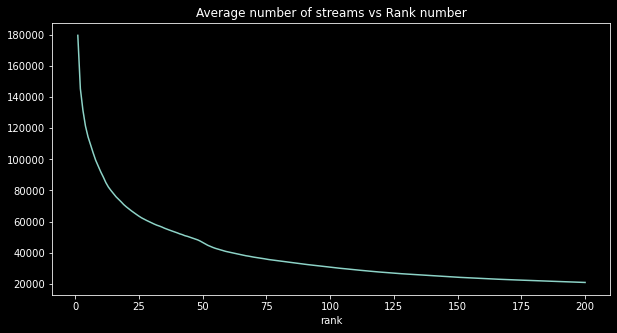

In [112]:
fig = plt.figure(figsize=(10,5))
df_ALL.groupby('rank').streams.mean().plot(title='Average number of streams vs Rank number')

Define a rink after which we can ignore the song
100 weeks | 5 weeks


In [160]:
duration_streams = df_ALL[['streams','Duration']].sort_values(by=['Duration'])

<AxesSubplot:xlabel='Duration'>

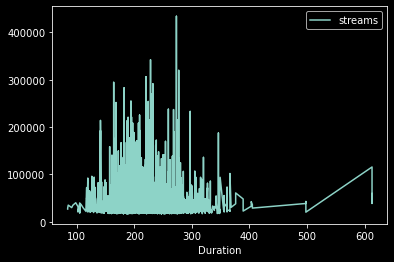

In [172]:

duration_streams.plot(x='Duration', y='streams')


In [23]:
df_ALL['Duration'].max() #613
df_ALL['Duration'].min() #84

84

In [71]:
df_ALL['duration_group'] = 5 * round(df_ALL['Duration']/5)

In [74]:
df_ALL['duration_group'].astype(int)

0        320
1        270
2        195
3        255
4        250
        ... 
10595    240
10596    210
10597    255
10598    210
10599    220
Name: duration_group, Length: 21200, dtype: int32

In [75]:
streams_density = df_ALL.groupby('duration_group').streams.mean()

In [46]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

Text(0.5, 0, 'Duration (5 seconds increment)')

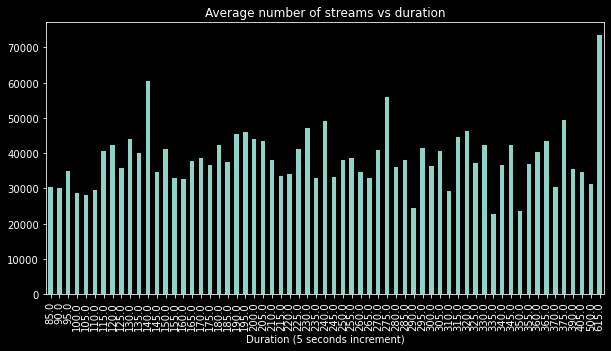

In [113]:
fig = plt.figure(figsize=(10,5))
streams_density.plot(kind='bar',title = 'Average number of streams vs duration')
plt.xlabel('Duration (5 seconds increment)')

In [58]:
df_ALL

,date,song,singer,streams,url_list,Company,Duration,Gender,Lang,duraction_group,duration_group
0,2020-12-25--2021-01-01,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,Crowd Lu,129313.0,https://open.spotify.com/track/3OC84eKMxRJ4x0H...,Team Ear Music,320,M,Can,320.0,320.0
1,2020-12-25--2021-01-01,是但求其愛,Eason Chan,115204.0,https://open.spotify.com/track/4IkQXb1IdIziAJm...,Eas Music Ltd,269,M,Can,270.0,270.0
2,2020-12-25--2021-01-01,一人之境 in C major,Terence Lam,112750.0,https://open.spotify.com/track/32QnXosZq7A11kn...,Terence Lam Production & Co.,195,M,Can,195.0,195.0
3,2020-12-25--2021-01-01,時光倒流一句話,Terence Lam,104521.0,https://open.spotify.com/track/63QmxPL3QlchvXc...,Terence Lam Production & Co.,253,M,Can,255.0,255.0
4,2020-12-25--2021-01-01,隔離 - Studio Live Duet,"Jace Chan, Terence Lam",104129.0,https://open.spotify.com/track/4xL01OuFjqizPDc...,Universal Music Ltd.,248,G,Can,250.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...
10595,2021-01-01--2021-01-08,あの夢をなぞって,YOASOBI,19571.0,https://open.spotify.com/track/5ptl2PXkiSth54H...,YOASOBI,240,G,Other,240.0,240.0
10596,2021-01-01--2021-01-08,AYA,MAMAMOO,19529.0,https://open.spotify.com/track/4BZXVFYCb76Q0Kl...,"RBW Inc.,under license to Kakao M Corp.",211,G,Other,210.0,210.0
10597,2021-01-01--2021-01-08,See You Next Time,AGA,19484.0,https://open.spotify.com/track/0y0l2x1hEwQ8d6Y...,Universal Music Ltd.,257,F,Can,255.0,255.0
10598,2021-01-01--2021-01-08,DDU-DU DDU-DU,BLACKPINK,19408.0,https://open.spotify.com/track/2aI2k39nfa3KFsa...,"YG Entertainment, distributed through Intersco...",211,G,Other,210.0,210.0
